In [3]:
#Importing packages
import bmxobs
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.coordinates import get_sun, get_body, SkyCoord, EarthLocation, AltAz
from astropy import units as u

In [4]:
#load one day's worth of data
date = "200526_0600"
d = bmxobs.BMXObs(date,"all_auto")

In [5]:
#Coverting timestamps of signal to mjd
#Reshaping signal amplitude and date to smaller array
sig_date = d.mjd
sig = np.mean(d[111], 1)

sig = sig [ :len(sig)//128 * 128]
sig = sig.reshape((-1,128)).mean(axis=1)

sig_date = sig_date [ :len(sig_date)//128 * 128]
sig_date = sig_date.reshape((-1,128)).mean(axis=1)

#Build Time object for sig date
dt = Time(sig_date, format="mjd")

d.ra = d.ra [ :len(d.ra)//128 * 128]
d.ra = d.ra.reshape((-1,128)).mean(axis=1)

In [6]:
#Sun position that corresponds to amplitude plot
#setting time and location of BMX
loc = EarthLocation(lat=40.869972*u.deg, lon=-72.866087*u.deg, height=0*u.m)

#Sun position in alt/az
frame = AltAz(obstime=dt, location=loc)
sun_altaz = get_sun(dt).transform_to(frame)

#Make arrays of time and altitude
sun = sun_altaz.obstime
sun_date = sun.mjd
sun_alt = sun_altaz.alt

In [7]:
#Building dataframe to make sure timestamps match
data = {'sun.mjd': sun_date, 'sig.mjd': sig_date}
df = pd.DataFrame(data=data)
pd.set_option("max_rows", 10)
df

,sun.mjd,sig.mjd
0,58995.274980,58995.274980
1,58995.276426,58995.276426
2,58995.277872,58995.277872
3,58995.279318,58995.279318
4,58995.280764,58995.280764
...,...,...
799,58996.430427,58996.430427
800,58996.431873,58996.431873
801,58996.433320,58996.433320
802,58996.434766,58996.434766


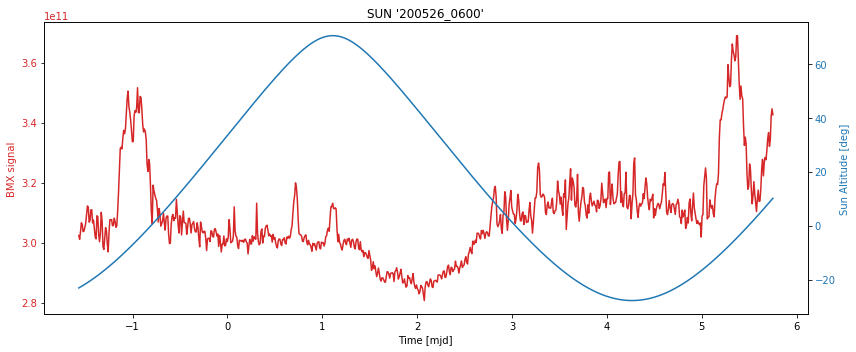

In [11]:
#Plot BMX signal with sun position
fig, ax1 = plt.subplots(figsize=(12,5))

color='tab:red'
ax1.set_xlabel('Time [mjd]')
ax1.set_ylabel('BMX signal', color=color)
ax1.plot(d.ra, sig, color=color, label='BMX Signal')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Sun Altitude [deg]', color=color)  # we already handled the x-label with ax1
ax2.plot(d.ra, sun_alt, color=color, label='Sun')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('SUN %r' % date)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [12]:
#grouping datasets that appear to follow a simialr trend
darray1=["200301_1200", "200305_1100", "200307_1100"]
darray2=["200201_1400", "200202_1400", "200203_1300"]  
darray3=["200101_1600", "200104_1500", "200105_1500", "200106_1500", "200107_1500", "200108_1500"]
darray4=["200514_0700", "200526_0600"]
darray5=["200128_1400", "200204_1300"]
darray6=["200401_1000", "200403_1000", "200404_0900", "200405_0900", "200408_0900", "200409_0900"]

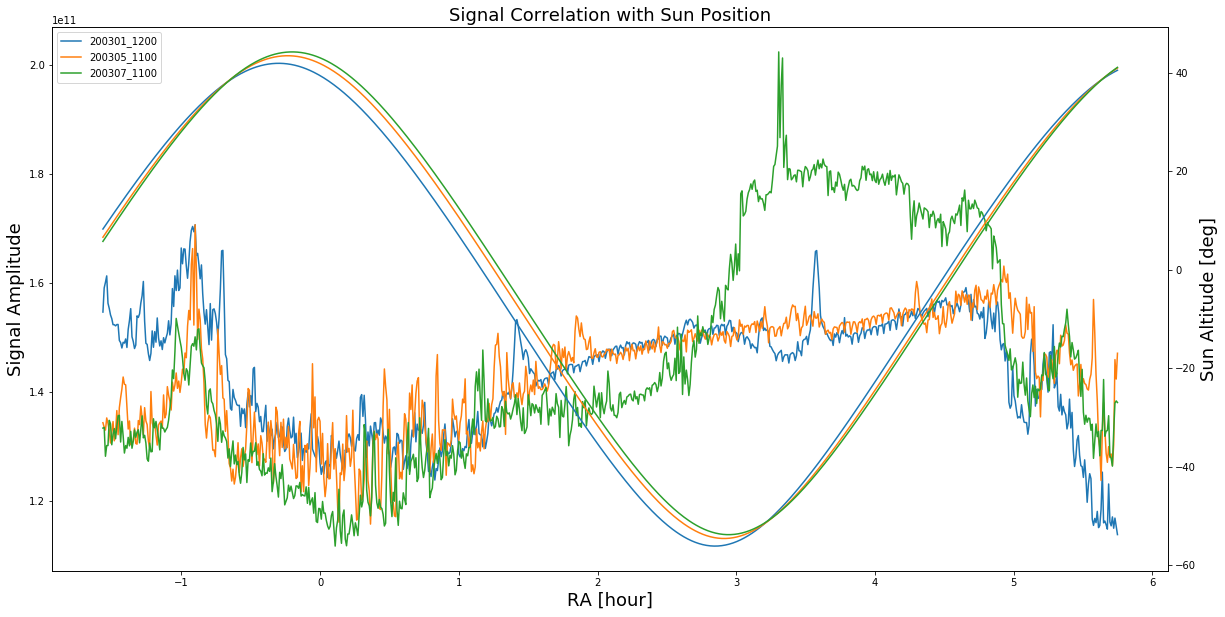

In [13]:
#plot signal and corresponding sun position on same plot
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_xlabel('RA [hour]', fontsize=18)
ax1.set_ylabel('Signal Amplitude', fontsize=18)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Sun Altitude [deg]', fontsize=18)

#select which array you wish to plot
for date in darray1:
    d = bmxobs.BMXObs(date,"all_auto")

    sig_date = d.mjd
    sig = np.mean(d[111], 1)

    sig = sig [ :len(sig)//128 * 128]
    sig = sig.reshape((-1,128)).mean(axis=1)

    sig_date = sig_date [ :len(sig_date)//128 * 128]
    sig_date = sig_date.reshape((-1,128)).mean(axis=1)

    #Build Time object for sig date
    dt = Time(sig_date, format="mjd")

    d.ra = d.ra [ :len(d.ra)//128 * 128]
    d.ra = d.ra.reshape((-1,128)).mean(axis=1)

    #Sun position in alt/az
    frame = AltAz(obstime=dt, location=loc)
    sun_altaz = get_sun(dt).transform_to(frame)

    #Make arrays of time and altitude
    sun = sun_altaz.obstime
    sun_date = sun.mjd
    sun_alt = sun_altaz.alt
    
    ax1.plot(d.ra, sig, label=date)
    ax2.plot(d.ra, sun_alt, label=date)

plt.title('Signal Correlation with Sun Position', fontsize=18)
plt.legend(loc='best')
plt.show()